In [ ]:
# Jack Duryea
# Cellular Automata Simulations
# July 2018

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import roc_curve
%matplotlib inline

In [16]:
def get_next_seq(previous_seq, rule):
    '''
    Use a rule to generate the next sequence for an automoton
    '''
    
    seq_length = len(previous_seq) - 2
    rule_length = len(rule.keys()[0])
    sub_seqs = [tuple(previous_seq[i:i + rule_length]) for i in range(0, seq_length)]
    new_seq = [rule[sub_seq] for sub_seq in sub_seqs]
    
    # Zero pad the ends 
    new_seq.insert(0, 0)
    new_seq.append(0)
    return new_seq

In [ ]:
ternary(5)

In [14]:
def get_wolfram_rule( rule_number ):
    '''
    Gets the mapping for the given rule.
    Each rule is essentially the binary version of the rule number
    '''
    binary_rep = str(bin(rule_number))[2:]
    # prepend 0s so that the are 8 bits
    binary_rep = [0]*(8-len(binary_rep)) + [int(b) for b in binary_rep]

    mapping = {
         (0,0,0): binary_rep[7],
         (0,0,1): binary_rep[6],
         (0,1,0): binary_rep[5],
         (0,1,1): binary_rep[4],
         (1,0,0): binary_rep[3],
         (1,0,1): binary_rep[2],
         (1,1,0): binary_rep[1],
         (1,1,1): binary_rep[0],
    }
    
    return mapping
    

In [73]:
# Initial conditions

start = list(np.zeros(501))
start[250] = 1

data = []
prev = start
num_gens = 250

for i in tqdm(range(num_gens)):
    data.append(prev)
    prev = get_next_seq(prev, get_wolfram_rule(30))

100%|██████████| 250/250 [00:00<00:00, 2136.26it/s]


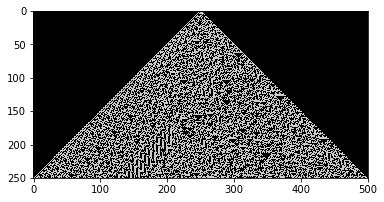

In [74]:
plt.imshow(np.array(data), cmap="spectral")


# Part 2: Neural Nets

In [20]:
import keras
from keras.datasets import mnist, cifar10
from keras.layers import Dense, Dropout, LSTM, Conv1D, Conv2D, Flatten
from keras.models import Sequential
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.layers import LeakyReLU


Using TensorFlow backend.


In [75]:
data_points = len(data)
X = np.array(data[0:-2])
y = np.array(data[1:-1]) # offset by 1
X_train, X_test, y_train, y_test = train_test_split(X,
    y, train_size=0.8)

In [80]:
model = Sequential()
model.add(Dense(1000,  activation="linear", input_dim = X_train.shape[1]))
model.add(LeakyReLU())

model.add(Dense(1000, activation="linear") )
model.add(LeakyReLU())
model.add(Dropout(0.5))

model.add(Dense(1000, activation="linear") )
model.add(LeakyReLU())
model.add(Dense(1000, activation="linear") )
model.add(LeakyReLU())
model.add(Dropout(0.5))

model.add(Dense(y.shape[1], activation="sigmoid") )
optim = keras.optimizers.Adam(lr=0.0001)
model.compile(loss='mse',
              optimizer=optim )

In [81]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100)

Train on 158 samples, validate on 40 samples
Epoch 1/100
158/158 [==============================] - 1s - loss: 0.2515 - val_loss: 0.2433
Epoch 2/100
158/158 [==============================] - 0s - loss: 0.2403 - val_loss: 0.2347
Epoch 3/100
158/158 [==============================] - 0s - loss: 0.2305 - val_loss: 0.2229
Epoch 4/100
158/158 [==============================] - 0s - loss: 0.2188 - val_loss: 0.2096
Epoch 5/100
158/158 [==============================] - 0s - loss: 0.2058 - val_loss: 0.1981
Epoch 6/100
158/158 [==============================] - 0s - loss: 0.1957 - val_loss: 0.1886
Epoch 7/100
158/158 [==============================] - 0s - loss: 0.1849 - val_loss: 0.1790
Epoch 8/100
158/158 [==============================] - 0s - loss: 0.1747 - val_loss: 0.1700ss: 0.173
Epoch 9/100
158/158 [==============================] - 0s - loss: 0.1661 - val_loss: 0.1648
Epoch 10/100
158/158 [==============================] - 0s - loss: 0.1603 - val_loss: 0.1620
Epoch 11/100
158/158 [===

158/158 [==============================] - 0s - loss: 0.0821 - val_loss: 0.1571
Epoch 89/100
158/158 [==============================] - 0s - loss: 0.0810 - val_loss: 0.1572
Epoch 90/100
158/158 [==============================] - 0s - loss: 0.0799 - val_loss: 0.1566
Epoch 91/100
158/158 [==============================] - 0s - loss: 0.0792 - val_loss: 0.1581
Epoch 92/100
158/158 [==============================] - 0s - loss: 0.0791 - val_loss: 0.1574
Epoch 93/100
158/158 [==============================] - 0s - loss: 0.0788 - val_loss: 0.1582
Epoch 94/100
158/158 [==============================] - 0s - loss: 0.0778 - val_loss: 0.1575
Epoch 95/100
158/158 [==============================] - 0s - loss: 0.0779 - val_loss: 0.1577
Epoch 96/100
158/158 [==============================] - 0s - loss: 0.0772 - val_loss: 0.1588
Epoch 97/100
158/158 [==============================] - 0s - loss: 0.0755 - val_loss: 0.1578
Epoch 98/100
158/158 [==============================] - 0s - loss: 0.0750 - val_los

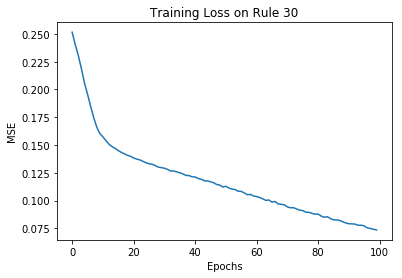

In [84]:
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("Training Loss on Rule 30")
plt.savefig("trainloss30.png",dpi=500)


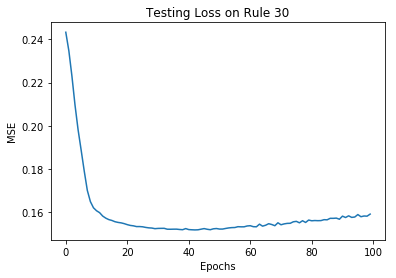

In [82]:
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("Testing Loss on Rule 30")
plt.savefig("testloss30.png",dpi=500)


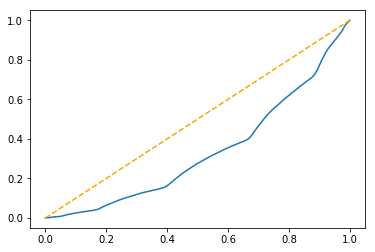

In [64]:
inputt = X_train
target = y_train

pred = model.predict(inputt)
fpr, tpr, thresholds = roc_curve(target.flatten(), pred.flatten())
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='orange',  linestyle='--')


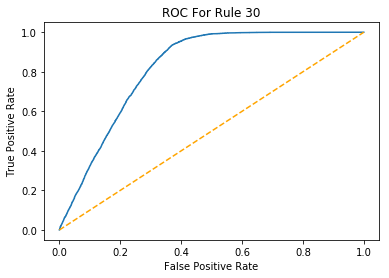

In [83]:
inputt = X_test
target = y_test

pred = model.predict(inputt)
fpr, tpr, thresholds = roc_curve(target.flatten(), pred.flatten())
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='orange',  linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC For Rule 30")
plt.savefig("ROC_test_rule30.png",dpi=500)